In [605]:
import tsa_utils
import deep_cnn
import mini_cnn

from shutil import copytree
import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tensorflow as tf
from numpy import genfromtxt
import pandas as pd
import sys
sys.path.append(os.getcwd())

import numpy as np
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import matplotlib.animation
import tensorflow as tf
from numpy import genfromtxt
import pandas as pd
import sys
import math 
import sklearn
from sklearn import metrics

sys.path.append(os.getcwd())
import mini_cnn
import pip
pip.main(['install', '--upgrade', 'dask'])
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler
import pickle
import scipy.misc
import skimage.io


Requirement already up-to-date: dask in /home/cody/anaconda3/envs/p2.7/lib/python2.7/site-packages


In [63]:
DATA_PATH="./images/"
CHECKPOINT_PATH="/output/multi-class8"
MODEL_ID="multi_class"


In [163]:
def tile_image(infile):
    x_step = 512 /8 
    y_step = 660/ 6
    data = []
#     for i in range(0,8):
#         for j in range(0,6):
#             data.append(tsa_utils.read_data_coords(infile, x_step*i, y_step*j, x_step, y_step))
#     print(np.array(data).shape)
#     return np.array(data).reshape((48*16*110),64)

    data = tsa_utils.read_data(infile)
    print(np.array(data).shape)
    return np.array(data).reshape(64,(48*16*110))

In [164]:
def untile_image(data):
    data=data.reshape(48,16,110,64)
    reshaped_data=[]
    for i in range(0,48):
        reshaped_data.append(data[i])
    return data

In [200]:
flat_image = tsa_utils.read_data("./images/5ad549b6c14ae5528a56216360e87829.aps").reshape(16 * 660, 512, order="A")

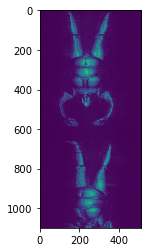

In [203]:
plt.imshow(flat_image[:1100,:])
plt.show()

In [428]:
all_labels = image_df.id.unique()

In [267]:
image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
# image_df=image_df.groupby("id").sum().reset_index()
image_df = image_df[image_df["zone"]=="Zone14"]
safe_labels = image_df[image_df["Probability"]== 0]["id"].unique()
unsafe_labels = image_df[image_df["Probability"]>0]["id"].unique()

In [71]:
# for label in labels:
#     tiled_image = tile_image(DATA_PATH + label + ".aps")
#     tiled_file = open(DATA_PATH + "pickled_images/" + label ,"wb+")
#     tiled_image.dump(tiled_file)

In [275]:
# image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
# image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
# image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
# image_df = image_df[(image_df["Probability"]!= 1) & (image_df["zone"]== "Zone14")]

# labels = image_df["id"].unique()
# matrix = []
# for label in labels[:10]:
#     try:
#         matrix.append(np.load(DATA_PATH + "/pickled_images/" + str(label)))
#     except Exception as e:
#         print(e)
# safe_matrix = np.vstack(matrix)

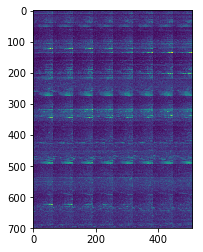

In [454]:
plt.imshow(np.load(DATA_PATH + "/pickled_images/" + str(label)).reshape(16 * 660, 512, order="A")[:700,:])
plt.show()

In [652]:
big_safe_pca = sklearn.decomposition.IncrementalPCA(n_components=90)
medium_safe_pca = sklearn.decomposition.IncrementalPCA(n_components=70)
small_safe_pca = sklearn.decomposition.IncrementalPCA(n_components=30)
micro_safe_pca = sklearn.decomposition.IncrementalPCA(n_components=10)

for label in safe_labels:
    try:
        data = tsa_utils.read_data(DATA_PATH + label + ".aps").reshape(16 * 660, 512, order="A")
        big_safe_pca.partial_fit(data)
        medium_safe_pca.partial_fit(data)
        small_safe_pca.partial_fit(data)
        micro_safe_pca.partial_fit(data)
    except Exception as e:
        print(e)


In [653]:
big_unsafe_pca = sklearn.decomposition.IncrementalPCA(n_components=90)
medium_unsafe_pca = sklearn.decomposition.IncrementalPCA(n_components=70)
small_unsafe_pca = sklearn.decomposition.IncrementalPCA(n_components=40)
micro_unsafe_pca = sklearn.decomposition.IncrementalPCA(n_components=10)

for label in unsafe_labels:
    try:
        data = tsa_utils.read_data(DATA_PATH + label + ".aps").reshape(16 * 660, 512, order="A")
        big_unsafe_pca.partial_fit(data)
        medium_unsafe_pca.partial_fit(data)
        small_unsafe_pca.partial_fit(data)
        micro_unsafe_pca.partial_fit(data)
    except Exception as e:
        print(e)


In [ ]:
unsafe_diffs =[]
for label in unsafe_labels:
    try:
        data = tsa_utils.read_data(DATA_PATH + label + ".aps").reshape(16 * 660, 512, order="A")
        transformed = micro_safe_pca.transform(data)
        reverse_transformed = micro_safe_pca.inverse_transform(transformed)
        diff = data - reverse_transformed
        unsafe_diffs.append(diff)
    except Exception as e:
        print(e)

In [ ]:
safe_diffs =[]
for label in safe_labels:
    try:
        data = tsa_utils.read_data(DATA_PATH + label + ".aps").reshape(16 * 660, 512, order="A")
        transformed = micro_safe_pca.transform(data)
        reverse_transformed = micro_safe_pca.inverse_transform(transformed)
        diff = data - reverse_transformed
        safe_diffs.append(diff)
    except Exception as e:
        print(e)

In [ ]:
safe_mean = sum([sum(sum(x)) for x in safe_diffs])/len(safe_diffs)
unsafe_mean = sum([sum(sum(x)) for x in unsafe_diffs])/len(unsafe_diffs)

In [ ]:
safe_mean

In [ ]:
unsafe_mean

In [717]:
safe_diffs = []
for label in unsafe_labels[:50]:
    try:
        unsafe_data = tsa_utils.read_data(DATA_PATH + label + ".aps").reshape(16 * 660, 512, order="A")
        unsafe_transformed = micro_unsafe_pca.transform(unsafe_data)
        unsafe_reverse_transformed = micro_unsafe_pca.inverse_transform(unsafe_transformed)
        unsafe_diff = unsafe_data - unsafe_reverse_transformed
        print(label)
    except Exception as e:
        print(e)

00360f79fd6e02781457eda48f85da90
0043db5e8c819bffc15261b1f1ac5e42
01c08047f617de893bef104fb309203a
087d7648e320f02c2c41e029f6cc2cd0
0ada538288f0b62b01510b397a8acb9e
112c6279f156611fef5f4cf55a9f1a9d
131894a9a9203782faac6fa3998621ec
158c596536e90a3edb3c84dbecc29420
15acb4dd4a23253939644369c8f3f92a
1bdbd76b8e1c2a8651262f857ed5f046
1e4a14d2e1eb381b773446de1c0c0b7e
23f25d09a5d8bf0d21df31ee78bd848a
28963ab78126f965b9b3867386698bc1
2a1a3dd5e6cd896e85ba8eec69f2744b
2a8bd2653b76d9bb771adccd4037e17b
2f1365e07ea2b02fffb768c985278d11
2f5c066720d997f33453dc491141bc70
333c64b18d7e64f0d53bf73cea1ab5ec
367beabd0587a210cd28655b2298823e
395fcd388faa7855b9a91db4dcb7d99a
3bf17d0319d35ebb98fc8066ddedf276
412d88bd9a4612b71759fa802a27f19e
49c8336f2a448c245088a04a05247790
4b28d86db0cedb95323986f74e8fc894
4d145eed143a972c0a19c9c4ec88524f
4d254b5690277f9446c82a81bb7ac56e
4f64179732ea872aec9e6e6614ac01da
5607fa30e4ae5e953223da36823639b7
575dba4891fccac96986f3e881ff0393
57dca9708440a62fc8c68883ca2616b9
5d4e4482ad

In [695]:
diff *= 1/diff.max()  
unsafe_diff *= 1/unsafe_diff.max()  
reverse_transformed *= 1/reverse_transformed.max()  
unsafe_reverse_transformed *= 1/unsafe_reverse_transformed.max()  

In [696]:
skimage.io.imsave("diff.png", diff)
skimage.io.imsave("unsafe_diff.png", unsafe_diff)
skimage.io.imsave("transformed.png", reverse_transformed)
skimage.io.imsave("unsafe_transformed.png", unsafe_reverse_transformed)

In [638]:
plt.imshow(data)
plt.rcParams["figure.figsize"] = (20,3)

plt.savefig("diff.png")

In [ ]:
im.convert("RGB")

In [688]:
np.absolute(unsafe_diff).sum()

71.693889085516389

In [689]:
diff_diff = diff - unsafe_diff

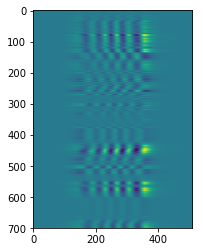

In [690]:
plt.imshow((diff_diff)[0:700,:])
plt.show()

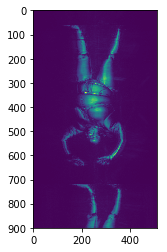

In [547]:
plt.imshow(data[600:1500,:])
plt.show()

In [162]:
image_df = pd.read_csv(DATA_PATH + 'stage1_labels.csv')
image_df['zone'] = image_df['Id'].str.split("_", expand=True)[1].str.strip()
image_df['id'] = image_df['Id'].str.split("_", expand=True)[0].str.strip()
image_df = image_df[(image_df["Probability"]== 1) & (image_df["zone"]== "Zone14")]

labels = image_df["id"].unique()
matrix = []
for label in labels:
    matrix.append(tsa_utils.read_data_coords(DATA_PATH + label + ".aps", "bottom","left")[0].flatten())
unsafe_matrix = np.vstack(matrix)
unsafe_matrix.shape
unsafe_matrix = unsafe_matrix

In [173]:
transformed = safe_pca.transform(unsafe_matrix)
unsafe_reverse_transformed = safe_pca.inverse_transform(transformed)